<h1><center>CSEN1022:Assignment 1</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Omar Tareq El-Sebaey

GUC-ID: 43-11815

Elective Tutorial No.: T007

**Member 2**

Name: Zeyad Salah Ali

GUC-ID: 43-3532

Elective Tutorial No.: T004

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data (Edit)

### Converting Colored Data to Grey Scale according to the following rule:
$$I_{grey}(p) = 0.3 \cdot I_{red}(p) + 0.59 \cdot I_{green}(p) + 0.11 \cdot I_{blue}(p)$$

In [2]:
def Convert_To_Greyscale(Data: np.ndarray):
    Images, Image_Size = Data.shape
    Image_Size //= 3

    Grey_Data = np.ndarray((Images, Image_Size), np.float32)

    for i in range(Images):
        for j in range(Image_Size - 3):
            Grey_Data[i, j] = 0.3 * Data[i, j * 3] + 0.59 * Data[i, j * 3 + 1] + 0.11 * Data[i, j * 3 + 2]

    return Grey_Data
    

### Data Classification

$$
X = 
\begin{cases}
    \text{Train} \rightarrow \text{All The Training Data (RGB)} (15000 \times 3072) \\
    \text{Test}  \rightarrow \text{All The Testing  Data (RGB)} (3000 \times 3072)
\end{cases}
\quad
Y = 
\begin{cases}
    \text{Train} \rightarrow \text{All The Training Data (Grey Scale)} (15000 \times 1024) \\
    \text{Test}  \rightarrow \text{All The Testing  Data (Grey Scale)} (3000 \times 1024)
\end{cases}
$$

In [4]:
# return (x_train, y_train), (x_test, y_test)

def Read_Data():
    airplane_train = np.array([plt.imread('Data/train/airplane/' + str(i) + '.jpg') / 255 for i in range(5000)], np.float32)
    automobile_train = np.array([plt.imread('Data/train/automobile/' + str(i) + '.jpg') / 255 for i in range(5000)], np.float32)
    frog_train = np.array([plt.imread('Data/train/frog/' + str(i) + '.jpg') / 255 for i in range(5000)], np.float32)

    airplane_test = np.array([plt.imread('Data/test/airplane/' + str(i) + '.jpg') / 255 for i in range(1000)], np.float32)
    automobile_test = np.array([plt.imread('Data/test/automobile/' + str(i) + '.jpg') / 255 for i in range(1000)], np.float32)
    frog_test = np.array([plt.imread('Data/test/frog/' + str(i) + '.jpg') / 255 for i in range(1000)], np.float32)

    airplane_train = airplane_train.reshape(5000, 3072)
    automobile_train = automobile_train.reshape(5000, 3072)
    frog_train = frog_train.reshape(5000, 3072)

    airplane_test = airplane_test.reshape(1000, 3072)
    automobile_test = automobile_test.reshape(1000, 3072)
    frog_test = frog_test.reshape(1000, 3072)

    X_Train = np.concatenate((airplane_train, automobile_train, frog_train))
    Y_Train = Convert_To_Greyscale(X_Train)

    X_Test = np.concatenate((airplane_test, automobile_test, frog_test))
    Y_Test = Convert_To_Greyscale(X_Test) 

    return (X_Train, Y_Train), (X_Test, Y_Test)


### Checking the Dimensions

In [5]:
Train_Data, Test_Data = Read_Data()

Train Data Size (RGB):  (15000, 3072)
Train Data Size (Grey):  (15000, 1024)
Test Data Size (RGB):  (3000, 3072)
Test Data Size (Grey):  (3000, 1024)


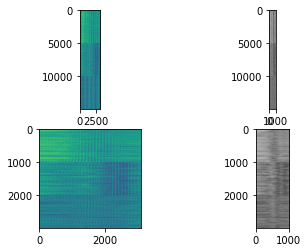

In [30]:
plt.subplots(2, 2)

plt.subplot(2, 2, 1)
plt.imshow(Train_Data[0])
print("Train Data Size (RGB): ", Train_Data[0].shape)

plt.subplot(2, 2, 2)
plt.imshow(Train_Data[1], cmap='gray')
print("Train Data Size (Grey): ", Train_Data[1].shape)

plt.subplot(2, 2, 3)
plt.imshow(Test_Data[0])
print("Test Data Size (RGB): ", Test_Data[0].shape)

plt.subplot(2, 2, 4)
plt.imshow(Test_Data[1], cmap='gray')
print("Test Data Size (Grey): ", Test_Data[1].shape)

<hr style="border:2px solid black"> </hr>

## Construct Fischer's Linear Discriminant classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

### Helper Function

In [66]:
def Weights_And_Biases(Data_Class, Not_Data_Class):
    M_1 = [Data_Class.mean(axis=0)]
    M_2 = [Not_Data_Class.mean(axis=0)]

    Seperation_1 = Seperation(Data_Class, M_1)
    Seperation_2 = Seperation(Not_Data_Class, M_2)

    Seperation_Vector = np.add(Seperation_1, Seperation_2)

    Seperation_Inverse = np.linalg.pinv((Seperation_Vector))

    Weights = Seperation_Inverse @ (M_1, M_2)
    Biases  = np.transpose(Weights) @ (-0.5 * (M_1 + M_2))
    
    return Weights, Biases

In [62]:
def Decision_Boundary(Weights, Data, Biases):
    return (np.transpose(Weights) @ Data) + Biases

In [69]:
def Seperation(Data_Class: np.ndarray, Mean: np.ndarray) -> np.ndarray:
    Seperation = np.zeros((Data_Class.shape), np.float32)

    Images, Image_Size = Data_Class.shape

    for i in range(Images):
        for j in range(Image_Size):
            Seperation += (Data_Class[i, j] - Mean) @ np.transpose((Data_Class[i, j] - Mean))
    
    return Seperation

In [ ]:
def Test(Weights_1, Weights_2, Weights_3, Bias_1, Bias_2, Bias_3, Test_Data, Confusion_Matrix_Row):
    Images, Image_Size = Test_Data.shape
    Confusion_Row = Confusion_Matrix_Row

    for i in range(Images):
        Y_1 = Decision_Boundary(Weights_1, np.transpose(Test_Data[i]), Bias_1)
        Y_2 = Decision_Boundary(Weights_2, np.transpose(Test_Data[i]), Bias_2)
        Y_3 = Decision_Boundary(Weights_3, np.transpose(Test_Data[i]), Bias_3)

        Max_Y = max(Y_1[0][0], Y_2[0][0], Y_3[0][0])

        if Y_1 == Max_Y:
            Confusion_Row[0] += 1
        elif Y_2 == Max_Y:
            Confusion_Row[1] += 1
        else:
            Confusion_Row[2] += 1
    
    return Confusion_Row

### There will be 3 Classifiers
$$
C_1
\begin{cases}
    \text{Airplane} \\
    \text{Not Airplane}
\end{cases}
\quad
C_2
\begin{cases}
    \text{Automobile} \\
    \text{Not Automobile}
\end{cases}
\quad
C_3
\begin{cases}
    \text{Frog} \\
    \text{Not Frog}
\end{cases}
$$

#### Initializing

In [70]:
X_Train_RGB = Train_Data[0]
X_Test_RGB  = Test_Data[0]

X_Train_Airplane_RGB    = X_Train_RGB[0     : 5000]
X_Train_Automobile_RGB = X_Train_RGB[5000  : 10000]
X_Train_Frog_RGB       = X_Train_RGB[10000 : 15000]

X_Test_Airplane_RGB    = X_Test_RGB[0    : 1000]
X_Test_Automobile_RGB = X_Test_RGB[1000 : 2000]
X_Test_Frog_RGB       = X_Test_RGB[2000 : 3000]

#### Training


In [71]:

Airplane_Weights, Airplane_Biases = Weights_And_Biases(X_Train_Airplane_RGB, np.concatenate((X_Train_Automobile_RGB, X_Train_Frog_RGB)))
Automobile_Weights, Automobile_Biases = Weights_And_Biases(X_Train_Automobile_RGB, np.concatenate((X_Train_Airplane_RGB, X_Train_Frog_RGB)))
Frog_Weights, Frog_Biases = Weights_And_Biases(X_Train_Frog_RGB, np.concatenate((X_Train_Automobile_RGB, X_Train_Airplane_RGB)))

#### Testing

In [ ]:
Confusion_Matrix_RGB = np.zeros((3, 3), dtype=np.float32)

Confusion_Matrix_RGB[0] = Test(Airplane_Weights, Automobile_Weights, Frog_Weights, Airplane_Biases, Automobile_Biases, Frog_Biases, X_Test_Airplane_RGB, Confusion_Matrix_RGB)
Confusion_Matrix_RGB[1] = Test(Airplane_Weights, Automobile_Weights, Frog_Weights, Airplane_Biases, Automobile_Biases, Frog_Biases, X_Test_Automobile_RGB, Confusion_Matrix_RGB)
Confusion_Matrix_RGB[2] = Test(Airplane_Weights, Automobile_Weights, Frog_Weights, Airplane_Biases, Automobile_Biases, Frog_Biases, X_Test_Frog_RGB, Confusion_Matrix_RGB)

In [ ]:
confusion_matrix = Confusion_Matrix_RGB
X_test = X_Test_RGB

## Confusion Matrix (Don't Edit)

In [31]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

NameError: name 'confusion_matrix' is not defined

### Repeat for Grayscale



#### Initializing

In [41]:
X_Train_Grey = Train_Data[1]
X_Test_Grey  = Test_Data[1]

X_Train_Airplane_Grey    = X_Train_Grey[0     : 5000]
X_Train_Automobile_Grey = X_Train_Grey[5000  : 10000]
X_Train_Frog_Grey       = X_Train_Grey[10000 : 15000]

X_Test_Airplane_Grey    = X_Test_Grey[0    : 1000]
X_Test_Automobile_Grey = X_Test_Grey[1000 : 2000]
X_Test_Frog_Grey       = X_Test_Grey[2000 : 3000] 

#### Training

In [ ]:
Airplane_Weights, Airplane_Biases = Weights_And_Biases(X_Train_Airplane_Grey, np.concatenate((X_Train_Automobile_Grey, X_Train_Frog_Grey)))
Automobile_Weights, Automobile_Biases = Weights_And_Biases(X_Train_Automobile_Grey, np.concatenate((X_Train_Airplane_Grey, X_Train_Frog_Grey)))
Frog_Weights, Frog_Biases = Weights_And_Biases(X_Train_Frog_Grey, np.concatenate((X_Train_Automobile_Grey, X_Train_Airplane_Grey)))

#### Testing

In [ ]:
Confusion_Matrix_Grey = np.zeros((3, 3), dtype=np.float32)

Confusion_Matrix_Grey[0] = Test(Airplane_Weights, Automobile_Weights, Frog_Weights, Airplane_Biases, Automobile_Biases, Frog_Biases, X_Test_Airplane_Grey, Confusion_Matrix_Grey)
Confusion_Matrix_Grey[1] = Test(Airplane_Weights, Automobile_Weights, Frog_Weights, Airplane_Biases, Automobile_Biases, Frog_Biases, X_Test_Automobile_Grey, Confusion_Matrix_Grey)
Confusion_Matrix_Grey[2] = Test(Airplane_Weights, Automobile_Weights, Frog_Weights, Airplane_Biases, Automobile_Biases, Frog_Biases, X_Test_Frog_Grey, Confusion_Matrix_Grey)

In [ ]:
confusion_matrix = Confusion_Matrix_Grey
X_test = X_Test_Grey

## Confusion Matrix (Don't Edit)

In [ ]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+GRAY = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

<hr style="border:2px solid black"> </hr>

## Comment on the change of accuracy between RGB and Grayscale
##########

Write Comment Here

...
...
...

##########
<hr style="border:2px solid black"> </hr>